### Importing necessary libraries

In [170]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### Load the Dataset

In [244]:
# Read the CSV file into a DataFrame from the specified file path

df = pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\DS_CareeR\NuCoT_TraininG\noTES\Machine Learning\Supervised Learning\Regression\social_network_ads.csv")

In [245]:
#determine the shape of the dataset
df.shape

(400, 5)

In [173]:
# Retrieve the list of column names in the DataFrame
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [174]:
# Display the first few rows of the DataFrame to inspect the data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [175]:
# Display information about the DataFrame, including the data types of columns and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [176]:
# Calculate the number of missing values (NaN) for each column in the DataFrame
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [177]:
# Calculate the number of unique values for each column in the DataFrame
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

### Data Preprocessing

In [246]:
# Convert the 'Gender' column to a categorical data type and then encode it with numerical codes
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int8 
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 13.0 KB


In [247]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0


### Data Visualization

In [248]:
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

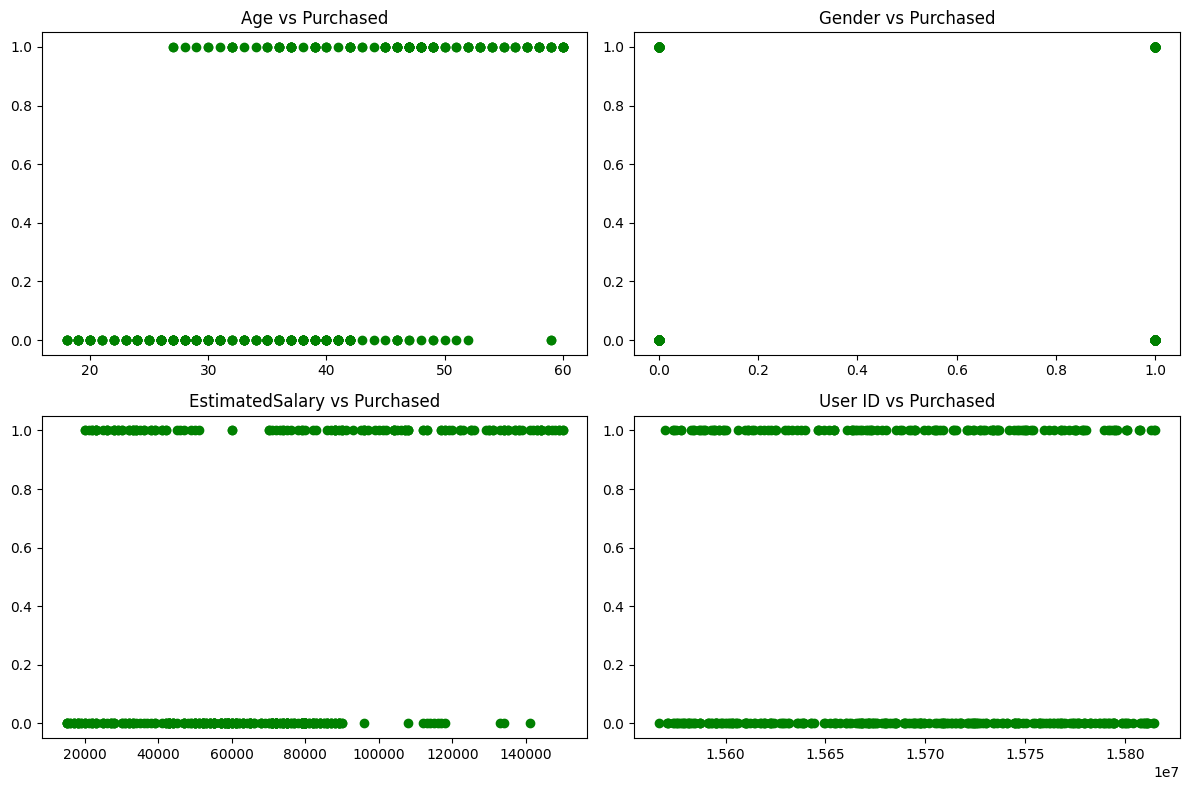

In [182]:

# Create a figure with a size of 12x8 inches
plt.figure(figsize=(12, 8))

# Plot 1: Age vs Purchased
plt.subplot(2, 2, 1)  # Create subplot at position 1
plt.scatter(df['Age'], df['Purchased'], color='green')  # Scatter plot for Age vs Purchased
plt.title('Age vs Purchased')  # Set title for the subplot

# Plot 2: Gender vs Purchased
plt.subplot(2, 2, 2)  # Create subplot at position 2
plt.scatter(df['Gender'], df['Purchased'], color='green')  # Scatter plot for Gender vs Purchased
plt.title('Gender vs Purchased')  # Set title for the subplot

# Plot 3: EstimatedSalary vs Purchased
plt.subplot(2, 2, 3)  # Create subplot at position 3
plt.scatter(df['EstimatedSalary'], df['Purchased'], color='green')  # Scatter plot for EstimatedSalary vs Purchased
plt.title('EstimatedSalary vs Purchased')  # Set title for the subplot

# Plot 4: User ID vs Purchased
plt.subplot(2, 2, 4)  # Create subplot at position 4
plt.scatter(df['User ID'], df['Purchased'], color='green')  # Scatter plot for User ID vs Purchased
plt.title('User ID vs Purchased')  # Set title for the subplot


# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()


After examining the graphs, it appears that the **'Purchased'[Dependent Variable]** label is primarily dependent on the **'Age'** feature. However, to explore the influence of other features on the model's performance, I'll include additional features in training the **logistic regression model**. Despite the initial indication that focusing solely on **'Age'** might yield **higher accuracy**, I want to investigate the impact of incorporating other features on the model's predictive power.

#### Data Preparation

In [261]:
#X = df.drop(['Age','User ID','Purchased','EstimatedSalary','Gender'],axis = 1)
X = df[['Age','Gender']]
Y = df[['Purchased']]

In [262]:
X.head(3)

,Age,Gender
0,19,1
1,35,1
2,26,0


In [263]:
Y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [264]:
#split the dataSet for training and testing

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)


In [265]:
# Print the shapes of training and testing data arrays
print(f'shape of X_train = {X_train.shape},\nshape of X_test = {X_test.shape} ,\nshape of Y_train = {Y_train.shape},\nshape of Y_test = {Y_test.shape}')

shape of X_train = (320, 2),
shape of X_test = (80, 2) ,
shape of Y_train = (320, 1),
shape of Y_test = (80, 1)


## Machine Learning Model - Logistic Regression

#### Logistic Regression

In [266]:
# Create a Logistic Regression model instance
logR=LogisticRegression()

#### Model Fitting

In [267]:
# Fit the Logistic Regression model to the training data
logR.fit(X_train,Y_train)

C:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Model Evaluation

In [268]:
# Evaluate the Logistic Regression model on the testing data and calculate the accuracy score

logR.score(X_test,Y_test)

0.875

In [270]:
import pandas as pd
#X = df.drop(['Age','User ID','Purchased','EstimatedSalary','Gender'],axis = 1)

# Create a dictionary with your data
data = {
    'Considered_Independent_Variables': ['Age_EstimatedSalary_Gender_User ID','Age_EstimatedSalary_Gender','Age_EstimatedSalary','Age_Gender','Age'],
    'Accuracy': [0.70, 0.71, 0.68,0.87,0.83]
}
# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(data)
# Display the DataFrame
accuracy_df

,Considered_Independent_Variables,Accuracy
0,Age_EstimatedSalary_Gender_User ID,0.70
1,Age_EstimatedSalary_Gender,0.71
2,Age_EstimatedSalary,0.68
3,Age_Gender,0.87
4,Age,0.83


After fitting the data to the model, it's evident that the combination of **'Age' and 'Gender'** features compared to **'Purchased'** yields a higher accuracy score. This suggests that considering both 'Age' and 'Gender' together contributes significantly to the predictive power of the model. Further analysis and experimentation may be warranted to explore the synergistic effects of these features on the model's performance.